In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv('data/C2A2_data/BinnedCsvs_d18/172a2fdce873f964749851f7565d3b3b189fad6bce734e5a5eaf082d.csv')

data['Data_Value']=data['Data_Value']*0.1
data['Date']=pd.to_datetime(data['Date'])
data['Year']=data['Date'].dt.year
data['Month_Day']=data['Date'].dt.strftime('%m-%d')
data=data[data['Month_Day']!='02-29']
max_temp=data[(data.Year>=2005)&(data.Year<2015)&(data['Element']=='TMAX')].groupby(['Month_Day'])['Data_Value'].max()
min_temp=data[(data.Year>=2005)&(data.Year<2015)&(data['Element']=='TMIN')].groupby(['Month_Day'])['Data_Value'].min()
data=data.merge(max_temp.reset_index(drop=False).rename(columns={'Data_Value':'Max_temp'}), on='Month_Day',how='left')
data=data.merge(min_temp.reset_index(drop=False).rename(columns={'Data_Value':'Min_temp'}),on='Month_Day',how='left')
record_high=data[(data.Year==2015)&(data.Data_Value>data.Max_temp)]
record_low=data[(data.Year==2015)&(data.Data_Value<data.Min_temp)]
date_index=np.arange('2015-01-01','2016-01-01',dtype='datetime64[D]')

plt.figure()
plt.plot(date_index,max_temp,color='lightcoral',linewidth=1)
plt.plot(date_index,min_temp,color='skyblue',linewidth=1)

plt.scatter(record_high.Date.values,record_high.Data_Value.values,color='red',s=8)
plt.scatter(record_low.Date.values,record_low.Data_Value.values,color='blue',s=8)
ax=plt.gca()
ax.axis(['2015/01/01','2015/12/31',-50,50])

plt.xlabel('Date',fontsize=10)
plt.ylabel('° Celsius',fontsize=10)
plt.title('Temperature in Ann Arbour, Michigan (2005-2015)',fontsize=12)

plt.legend(['Record high (2005-2014)','Record low (2005-2014)','Record breaking high in 2015','Record breaking low in 2015'],loc=0,frameon=False)
ax.fill_between(date_index, max_temp,min_temp,facecolor='grey',alpha=0.25)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

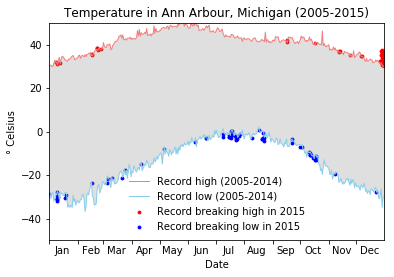

In [4]:
plt.show()